In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data and creating DataFrame
df = pd.read_csv('./data/data_eda.csv')

In [3]:
df.head()

,reactor_energy,dissolved_oxygen,dissolved_oxygen_outlet,rotors_depth_level,turbidity,outlet_temp,reactor_temp,ras_tss,was_station,feedflow_to_reactor,raw_sewage_conductivity,raw_sewage_tss,pH,b11_flowmeter,ammonia_outlet_conc,nitrate_outlet_conc
0,6.253829,-0.563875,-1.005122,3.323272,0.941958,3.148368,3.087856,1.577121,6.002427,8.440096,7.200127,6.140624,1.982655,6.742881,1.759925,1.782719
1,6.508769,-0.916291,0.706063,3.323272,0.664748,3.270063,3.229618,2.369589,5.922589,8.697179,6.889042,6.116709,1.940323,6.131226,2.309859,1.486140
2,6.492240,-0.903868,-1.005122,3.340739,0.594431,3.270025,3.229499,2.357263,5.922361,8.670944,6.891543,6.120322,1.939317,6.131226,2.315896,1.483421
3,6.519147,-0.563875,-1.005122,3.322371,0.564177,3.269949,3.229420,2.375464,5.922289,8.624073,6.892054,6.122624,1.938742,6.165418,2.323172,1.474992
4,6.486161,-1.005122,0.705570,3.323272,0.618424,3.269911,3.229341,2.375743,5.922085,8.682369,6.901016,6.130985,1.939317,6.779922,2.330298,1.472243


In [4]:
# Importing the train- test model from sklearn library
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('ammonia_outlet_conc', axis=1)
y = df['ammonia_outlet_conc']

In [6]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

I am going to use 5 different machine learning models:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Nearest Neighbors
5. Random Forest

# Using Linear Regression

In [7]:
# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
# Fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
# Training the model
lr.score(X_train,y_train)

0.11130630475064651

In [10]:
# Making the predictions
y_preds = lr.predict(X_test)

In [11]:
# Checking predictions
y_preds

array([1.56364782, 1.60467899, 1.14400708, ..., 1.13632873, 1.75237988,
       1.62760663])

In [12]:
# Test Model Score
lr.score(X_test,y_test)

0.11139200645036806

In [13]:
# Importing mean_absolute_errora and mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_preds))

0.6276625685405379


In [14]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

0.9176059548560417


In [15]:
# Calculating mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
rmse

0.9579175094213707

In [16]:
# Preparing function to draw plots
def draw_plots(y_test, y_preds):
    '''
    Creates histogram and regression plots of y_test and y_preds
    
    Args:
        y_test = target data from test set
        y_preds = predicted target 
    '''
    fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
    ax[0,0].hist(y_preds)
    ax[0,0].set_title('Histogram of predicted y')
    ax[0,0].set_xlabel('Pridected y')
    ax[0,0].set_ylabel('Count')

    sns.regplot(y_test, y_preds, ax = ax[0,1])
    ax[0,1].set_title('Actual y vs. Predicted y')
    ax[0,1].set_xlabel('Actual y')
    ax[0,1].set_ylabel('Predicted y')

    sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
    ax[1,0].set_title('Residual Plot')
    ax[1,0].set_xlabel('Predicted y')
    ax[1,0].set_ylabel('Residuals')

    ax[1,1].hist(y_test - y_preds)
    ax[1,1].set_title('Histogram of Residuals')
    ax[1,1].set_xlabel('Residuals')
    ax[1,1].set_ylabel('Count');

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


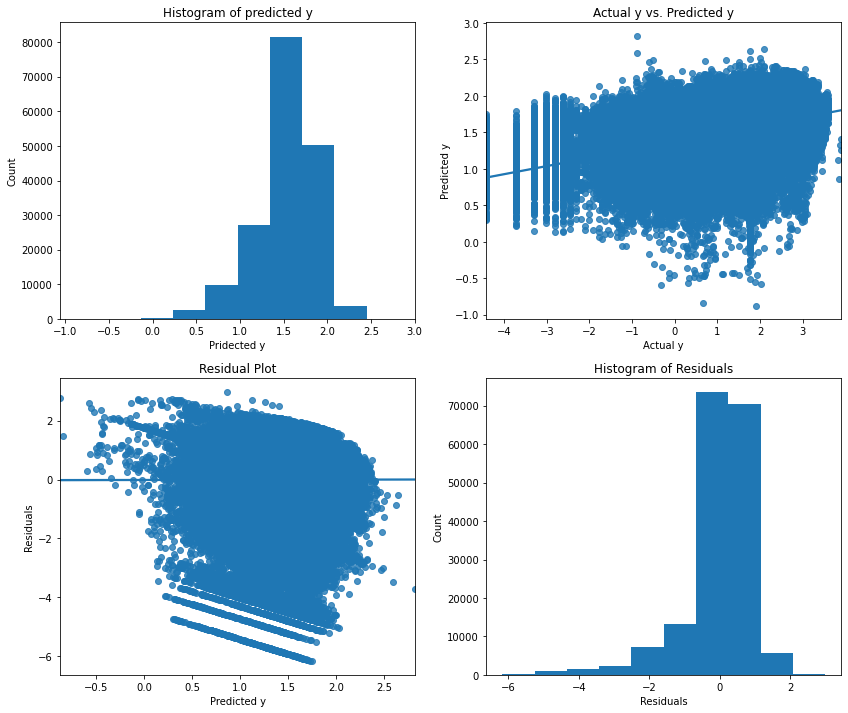

In [17]:
# Making the plots
draw_plots(y_test,y_preds)


# Using Ridge Regresssion

In [18]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge
ri = Ridge()

In [19]:
ri.fit(X_train,y_train)

Ridge()

In [20]:
ri.score(X_train,y_train)

0.11130629818891224

In [21]:
yr_preds= ri.predict(X_test)

In [22]:
yr_preds

array([1.56369657, 1.60459738, 1.14398282, ..., 1.13644568, 1.75229115,
       1.6276597 ])

In [23]:
ri.score(X_test,y_test)

0.11139127094639223

In [24]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

0.6276619792305721


In [25]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

0.9176067143617326


In [26]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yr_preds)))
rmse

0.9579179058571421


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


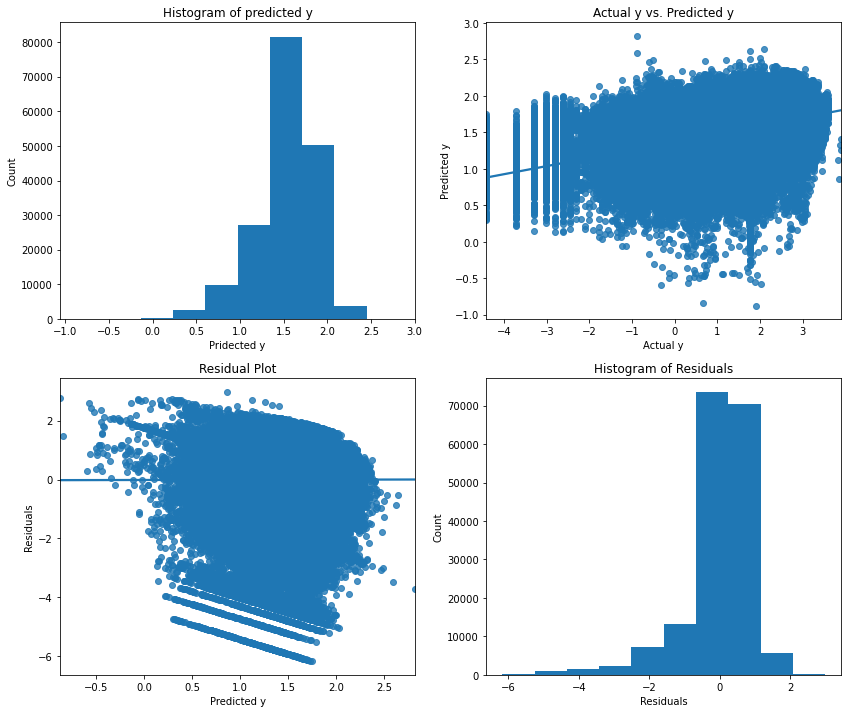

In [27]:
draw_plots(y_test,yr_preds)


# Using Lasso Regression

In [28]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [29]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [30]:
# Finding Train model score
la.score(X_train, y_train)

0.0

In [31]:
# Making Predictions
yl_preds = la.predict(X_test)

In [32]:
yl_preds

array([1.54144556, 1.54144556, 1.54144556, ..., 1.54144556, 1.54144556,
       1.54144556])

In [33]:
# Finding test model score
la.score(X_test, y_test)

-2.761183845434445e-05

In [34]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

0.6666550509135784


In [35]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

1.032661531636536


In [36]:
# Calculating Root Mean squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yl_preds)))
rmse

1.0161995530586185


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


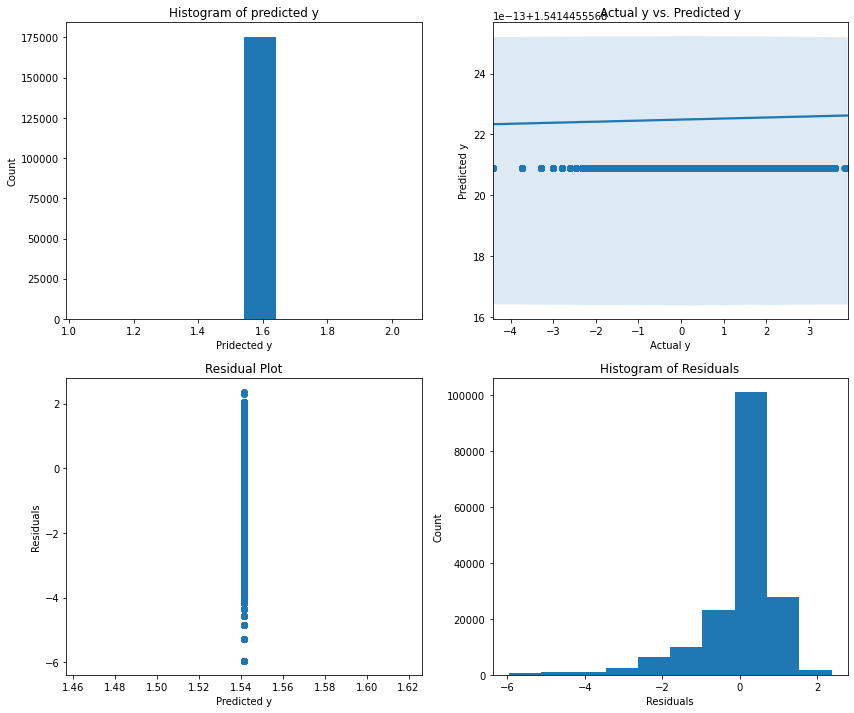

In [37]:
draw_plots(y_test,yl_preds)

# Using K-Nearest Neighbors

In [38]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [39]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [40]:
# Finding Train model score
knn.score(X_train, y_train)

0.6425161436257066

In [41]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [42]:
yk_preds

array([0.97244558, 1.75992475, 0.62509624, ..., 0.19375302, 1.92426813,
       2.09394155])

In [43]:
# Finding test model score
knn.score(X_test, y_test)

0.45260070920759576

In [44]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

0.38495771517126914


In [45]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

0.5652625821073363


In [46]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yk_preds)))
rmse

0.751839465648975


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


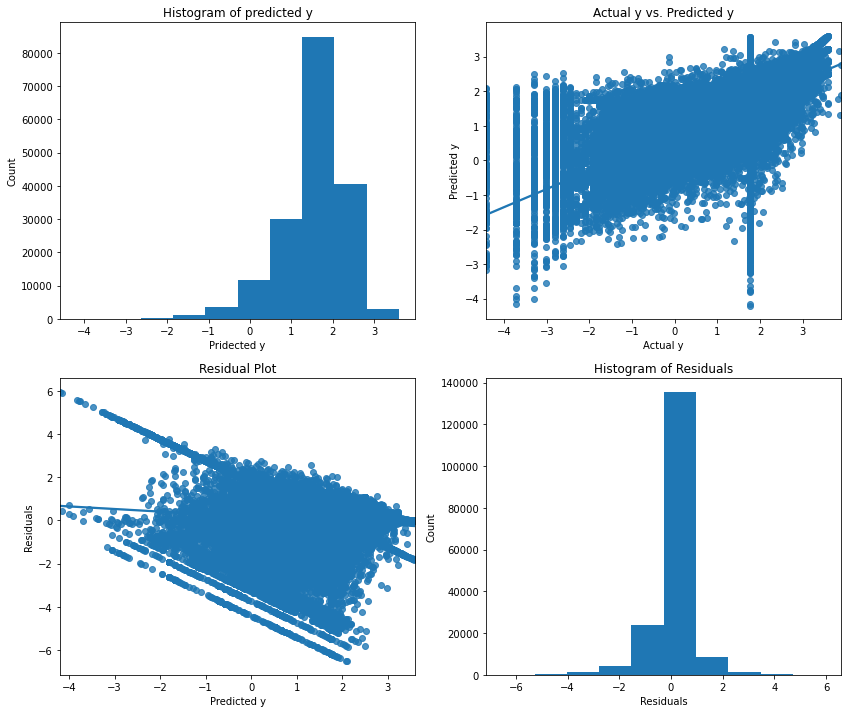

In [47]:
draw_plots(y_test,yk_preds)

# Using Random Forest


In [48]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [49]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
# Finding Train model score
rf.score(X_train, y_train)

0.9357770517012505

In [51]:
# Making Predictions
yrf_preds = rf.predict(X_test)
yrf_preds

array([1.36000167, 1.75992475, 1.07911159, ..., 0.09170256, 1.99640094,
       1.95060794])

In [52]:
# Finding test model score
rf.score(X_test, y_test)

0.537661230644219

In [53]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

0.35765735022399964


In [54]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

0.47742627908060004


In [55]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yrf_preds)))
rmse

0.6909604034100651


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


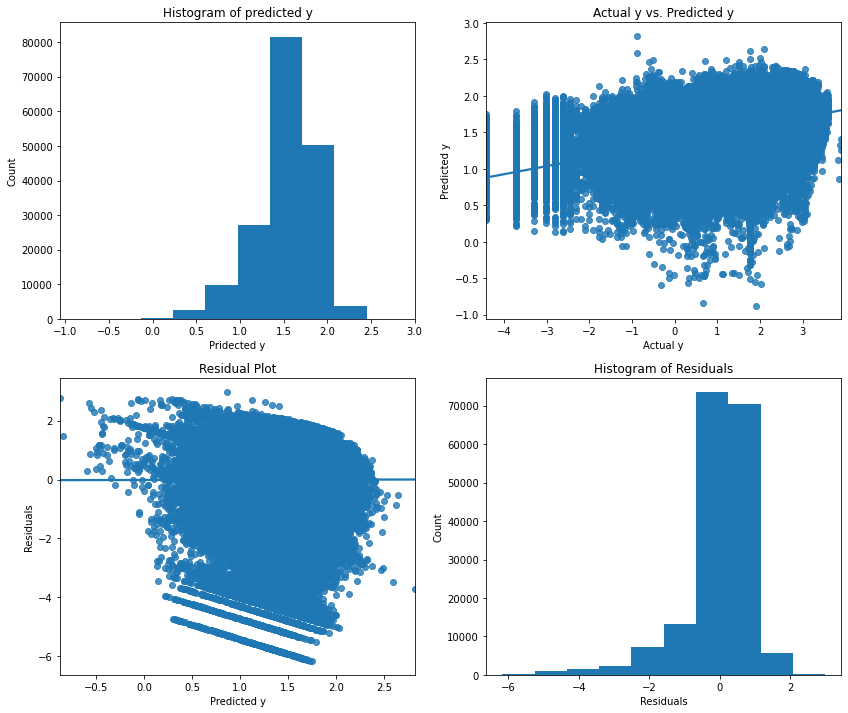

In [56]:
draw_plots(y_test,y_preds)

In [57]:
# Pandas DataFrame for Model and RMSE
model = pd.Series(['Linear', 'Ridge', 'Lasso', 'KNN', 'RandomForest'])
rmse = pd.Series([0.957917509421370, 0.9579179058571421, 1.0161995530586185, 0.751839465648975, 0.6909604034100651])
modelRmsedf = pd.DataFrame({'Model':model, 'RMSE':rmse})
modelRmsedf

,Model,RMSE
0,Linear,0.957918
1,Ridge,0.957918
2,Lasso,1.016200
3,KNN,0.751839
4,RandomForest,0.690960


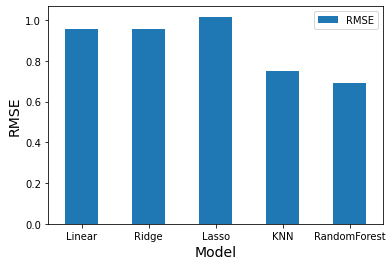

In [58]:
# Bar Plot of Models and their RMSE values
modelRmsedf.plot(x = 'Model', y = 'RMSE', kind = 'bar')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

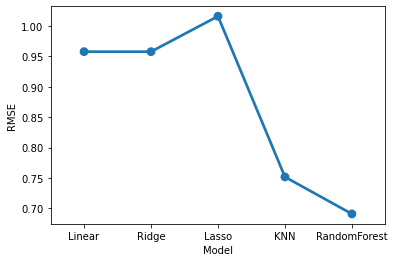

In [59]:
# Pointplot of RMSE values
fig, axes = plt.subplots()
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmsedf)
plt.show()